# ヒストグラムの計算と可視化

## ヒストグラムとは

ヒストグラムとは画像中の画素値の全体的な分布を知るための図（グラフやプロット）である。横軸に画素値(常にではないけど0から255の値を持つ)、縦軸に画素値の出現頻度となる。ヒストグラムを観ることで画像のコントラスト、明るさ、画素値の分布などが直観的に理解できる。

今日利用できる画像処理ソフトのほとんどがヒストグラムに関する機能を持っている。

以下に示す画像は [Cambridge in Color website](http://www.cambridgeincolour.com/tutorials/histograms1.htm)の内の1枚である。

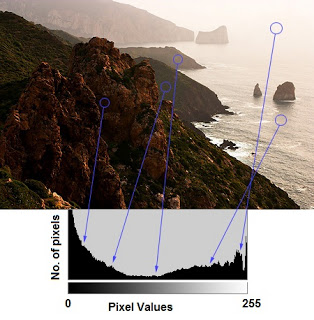</img>

画像とそのヒストグラムを載せる。
(このヒストグラムはグレースケール画像のヒストグラムであり、カラー画像のヒストグラムでない点を注意すること)。

ヒストグラムの左側の領域は画像中の暗い画素の出現頻度、右側の領域は画像中の明るい画素の出現頻度を表している。  
ヒストグラムから暗い領域の方が多いことや画素値の中間領域(ここでは127付近)の画素はほとんどないことなどが分かる。

## ヒストグラムの計算

ヒストグラムがどんなものであるか分かったので、次は計算方法について学ぶことにする。このための関数を、OpenCvとNumpyはそれぞれ用意している。これらの関数を使う前にヒストグラムに関する専門用語を理解する必要がある。

**BINS** :上記のヒストグラムは全画素値(0から255)の画素数を表示しており、256個の数値が必要である。

しかし、全画素値の画素数を独立して計算する必要が無く、特定の間隔毎の画素数を知りたいとする。  
例えば0から15，16から31, …, 240から255の範囲での画素値を持つ画素の出現頻度を知りたい場合、ヒストグラムを表すために必要な数値はたったの16個で済む。

これがまさに OpenCVのヒストグラムについてのチュートリアル に載せた例である。

それにはヒストグラム全体を16個の小領域に分割し、各小領域の画素数の合計値を計算することである。この各小領域を “ビン(BIN)” と呼ぶ。
最初の例ではビンの数は 256(各ビンが各画素値に対応)、二番目の例ではビンの数は16である。
OpenCVのドキュメント中ではビンの数は histSize と呼ばれている。

**DIMS** : 収集するデータの数を表すパラメータ。今回の例では1つのデータのみ(画素値)を扱う。そのため、この例では 1 になる。

**RANGE** : 計測したい画素値の範囲を表す。通常は [0,256] の全画素値になる。

### OpenCVを使ったヒストグラムの計算¶

それでは cv2.calcHist() 関数を使ってヒストグラムを計算してみよう。 :

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

1. images : 入力画像。画素値のデータ型はuint8かfloat32のどちらかである．記号[]を使って “[img]” のように指定する。
1. channels : ヒストグラムを計算する画像のチャンネルのインデックス。入力画像がグレース画像であれば[0]を指定する。カラー画像であればヒストグラムを計算するB,G,Rの色相に対応する[0]，[1]，[2]のどれかの値を指定する。
1. mask : マスク画像。画像中の全画素のヒストグラムを計算する場合 “None” を指定する。画像中の特定領域のヒストグラムを計算する場合は特定領域を表すマスク画像を指定する(以下に例を示す)。
1. histSize : ビンの数。この引数も記号[]を使って指定する。全画素値を対象とするのであれば [256] を指定する。
1. ranges : ヒストグラムを計測したい画素値の範囲を表す RANGE 。通常は [0,256] を指定する。

サンプル画像のヒストグラムを計算してみる。サンプル画像をグレースケール画像として読み込み、全範囲のヒストグラムを計算する。

In [83]:
img = cv2.imread('pc5.jpg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

### Numpyを使ったヒストグラムの計算

Numpyもヒストグラムの計算をするための関数 np.histogram() を用意している。 calcHist() の代わりにこの関数を使ってみよう。 :

In [84]:
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

hist は先ほどのOpenCVの例と同じだが、ビンの数が257個である点が違う。なぜなら、Numpyはビンを0-0.99, 1-1.99, 2-2.99 と計算するからである。つまり、最後の範囲は255-255.99になる。これを表現するためにビンの最後に256が追加されている。しかし、ビンは256もいらず、255で十分である。

<div style="
    position: relative;
    margin: 2em 0;
    padding: 25px 10px 7px;
    border: solid 2px #00B9EF;
">
    <span style="
        position: absolute;
        display: inline-block;
        top: -2px;
        left: -2px;
        padding: 0 9px;
        height: 25px;
        line-height: 25px;
        vertical-align: middle;
        font-size: 17px;
        background: #00B9EF;
        color: #ffffff;
        font-weight: bold;    
    ">Note</span>
    Numpyはnp.histogram()より10倍ほど高速な np.bincount() という関数も用意している。<br>1次元ヒストグラムを計算するのであれば、この関数を使うとよい。<p>  hist = np.bincount(img.ravel(),minlength=256)　minlength = 256 と設定するのを忘れないようにすること。
    <p>OpenCVの関数はnp.histogram()と比べて，さらに高速(40倍ほど)である。
</div>

## ヒストグラムの可視化

ヒストグラムを可視化する方法は2種類ある。

1. 短いコードで: Matplotlib を使う
2. 長いコードで: OpenCV を使う

### Matplotlibを使う

Matplotlibはヒストグラムを描画する関数を用意している: matplotlib.pyplot.hist()

この関数はヒストグラムの計算と描画の両方を行う関数である。  
そのため、calcHist() や np.histogram()によってヒストグラムを計算する必要がない。

以下に使い方を示す:

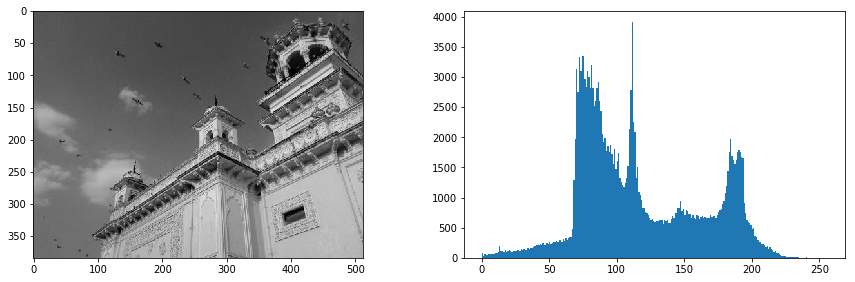

In [95]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('home.jpg', 0)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 2)

plt.hist(img.ravel(), 256, [0, 256])
plt.show()

もしくはmatplotlibの通常のプロットを使う。この方法はカラー画像のヒストグラムの可視化に向いている。
この方法では、まず初めにヒストグラムを計算しておく必要がある。

以下のコードを試してみなさい:

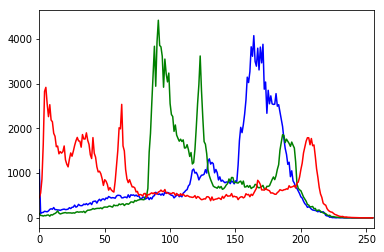

In [96]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('home.jpg')
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

このヒストグラムを見ると，画像中の青成分が高い値を持っていることが分かる(空の色であることは明らかだ)。

### OpenCVを使う

ここではx,y座標のようにヒストグラムのビンの値を調整し，cv2.line() か cv2.polyline() を使って上記のような画像を作成する。

In [8]:
from __future__ import print_function

import numpy as np
import cv2 as cv

bins = np.arange(256).reshape(256, 1)


def hist_curve(im):
    h = np.zeros((300, 256, 3))
    if len(im.shape) == 2:
        color = [(255, 255, 255)]
    elif im.shape[2] == 3:
        color = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    for ch, col in enumerate(color):
        hist_item = cv.calcHist([im], [ch], None, [256], [0, 256])
        cv.normalize(hist_item, hist_item, 0, 255, cv.NORM_MINMAX)
        hist = np.int32(np.around(hist_item))
        pts = np.int32(np.column_stack((bins, hist)))
        cv.polylines(h, [pts], False, col)
    y = np.flipud(h)
    return y


def hist_lines(im):
    h = np.zeros((300, 256, 3))
    if len(im.shape) != 2:
        print("hist_lines applicable only for grayscale images")
        # print("so converting image to grayscale for representation"
        im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    hist_item = cv.calcHist([im], [0], None, [256], [0, 256])
    cv.normalize(hist_item, hist_item, 0, 255, cv.NORM_MINMAX)
    hist = np.int32(np.around(hist_item))
    for x, y in enumerate(hist):
        cv.line(h, (x, 0), (x, y), (255, 255, 255))
    y = np.flipud(h)
    return y


def main():
    import sys

    fname = 'home.jpg'
    im = cv.imread(cv.samples.findFile(fname))

    if im is None:
        print('Failed to load image file:', fname)
        sys.exit(1)

    gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

    print(''' Histogram plotting \n
    Keymap :\n
    a - show histogram for color image in curve mode \n
    b - show histogram in bin mode \n
    c - show equalized histogram (always in bin mode) \n
    d - show histogram for color image in curve mode \n
    e - show histogram for a normalized image in curve mode \n
    Esc - exit \n
    ''')

    cv.imshow('image', im)
    while True:
        k = cv.waitKey(0)
        if k == ord('a'):
            curve = hist_curve(im)
            cv.imshow('histogram', curve)
            cv.imshow('image', im)
            print('a')
        elif k == ord('b'):
            print('b')
            lines = hist_lines(im)
            cv.imshow('histogram', lines)
            cv.imshow('image', gray)
        elif k == ord('c'):
            print('c')
            equ = cv.equalizeHist(gray)
            lines = hist_lines(equ)
            cv.imshow('histogram', lines)
            cv.imshow('image', equ)
        elif k == ord('d'):
            print('d')
            curve = hist_curve(gray)
            cv.imshow('histogram', curve)
            cv.imshow('image', gray)
        elif k == ord('e'):
            print('e')
            norm = cv.normalize(gray, gray, alpha=0,
                                beta=255, norm_type=cv.NORM_MINMAX)
            lines = hist_lines(norm)
            cv.imshow('histogram', lines)
            cv.imshow('image', norm)
        elif k == 27:
            print('ESC')
            cv.destroyAllWindows()
            break

    print('Done')


if __name__ == '__main__':
    print(__doc__)
    main()
cv.destroyAllWindows()

Automatically created module for IPython interactive environment
 Histogram plotting 

    Keymap :

    a - show histogram for color image in curve mode 

    b - show histogram in bin mode 

    c - show equalized histogram (always in bin mode) 

    d - show histogram for color image in curve mode 

    e - show histogram for a normalized image in curve mode 

    Esc - exit 

    
a
b
hist_lines applicable only for grayscale images
c
d
e
ESC
Done


## マスクの適用

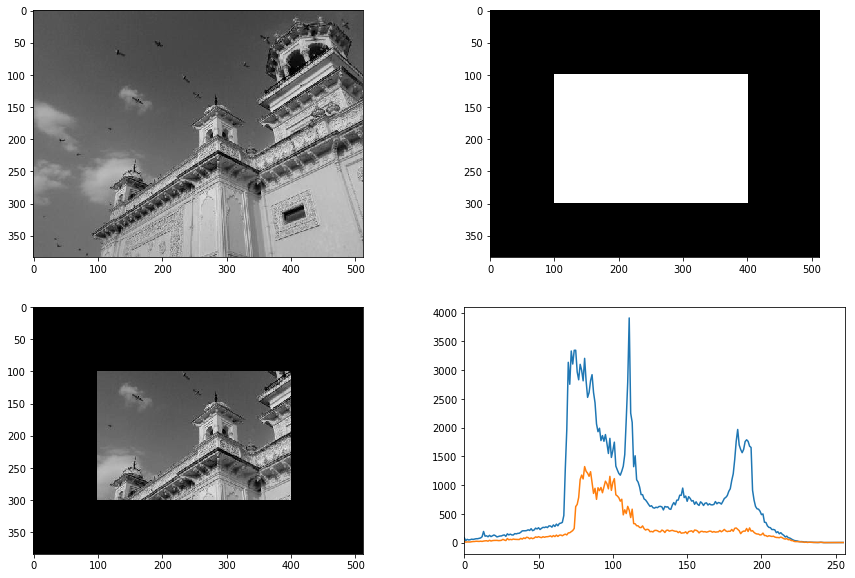

In [12]:
img = cv2.imread('home.jpg', 0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])

plt.show()

# ヒストグラムの平坦化

画素値が特定の範囲に集中している画像を考えてみる。例えば明るい画像は画素値が高い範囲に集中している。しかし、良い画像は画素値が全範囲に万遍なく分布しているものである。

良い画像を得るにはこのヒストグラムを両側に向けて伸ばす必要があり、これがまさにヒストグラム平坦化の処理になる。この処理によって画像のコントラストが改善される。

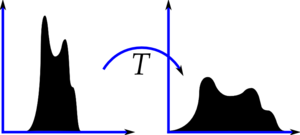

詳細な説明に関しては，Wikipediaの [ヒストグラム平坦化](http://en.wikipedia.org/wiki/Histogram_equalization) に関する記事を読むことを勧める。例を示しながら詳しく説明しているため、十分な理解が得られるだろう。

それではまず、Numpyを使った実装を紹介し，次にOpenCVの関数を紹介する。

## Numpyを使ったヒストグラム平坦化

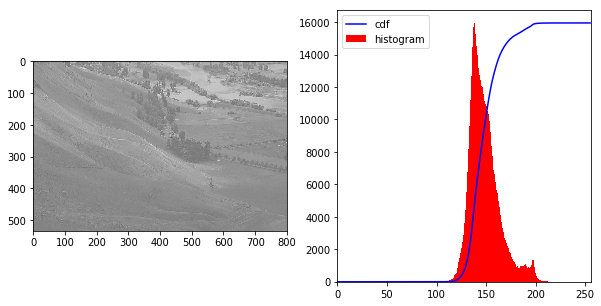

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('pc5.jpg', 0)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# plt.subplot(行数, 列数, 何番目のプロットか)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

ヒストグラムが明るい領域に集中している事が分かる。全スペクトルが必要なため、原画像の明るい領域に集中した画素値を全範囲に分布させるための変換関数が必要となる。これがヒストグラム平坦化が行う処理である。

ヒストグラムの最小値(0ではない)を見つけ、wikipediaのページに書いてあるようにヒストグラム平坦化の式に適用する。ここでNumpyのマスクされた配列の概念を使う。マスクされた配列を使うと、全処理がマスクされていない要素にのみ適用される。

詳しくはNumpyのドキュメントのマスクされた配列(masked arrays)の部分を参照。

In [18]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

出力画像を得るための参照テーブルが求まった。参照テーブルを使った画素値の返還は以下の様になる。

In [20]:
img = cdf[img]

結果画像、結果画像のヒストグラム、結果画像の画素値の累積分布関数は以下のようになる。：

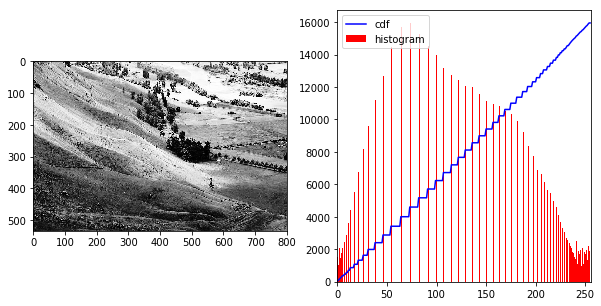

In [23]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# plt.subplot(行数, 列数, 何番目のプロットか)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

もう一つの重要な特徴として、もしも入力画像が例にしようした明るい画像ではなく全体的に暗い画像だったとしても、ヒストグラム平坦化によって得られる結果はほとんど同じような画像になる。

結果として全ての画像を同じような光源環境で撮影した画像へ変換する “参照ツール” とも言える。これは様々なケースで役に立つ。

例えば、顔認識を行う際に、顔画像データベースを使った学習を行う前に全データに対してヒストグラム平坦化を行い光源環境を揃えることができる。

## OpenCVを使ったヒストグラム平坦化¶

OpenCVはヒストグラム平坦化を行うには cv2.equalizeHist() 関数を使う。グレースケール画像を入力とし、ヒストグラム平坦化された画像を出力する。

同じ画像に対して cv2.equalizeHist() を適用した結果を示す :

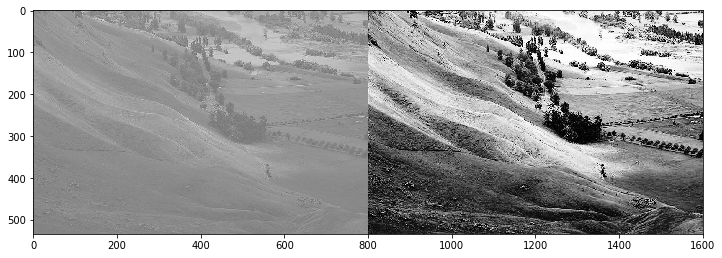

In [30]:
img = cv2.imread('pc5.jpg', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))  # stacking images side-by-side

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.show()

これで光源環境が異なる色々な画像を撮影し、コントラストを向上させ、結果を確認できるようになった。

ヒストグラム平坦化はヒストグラムが特定の範囲に集中している時に効果を発揮する。一方で、ヒストグラムが広範囲に分布しているような画像に対してはうまく機能しない。補足資料に載せたStackOverflowのページを参照。

### Numpy と Opencv で平坦化した画像を比較する

176026
251174


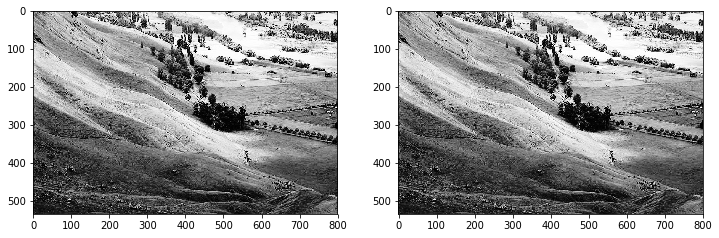

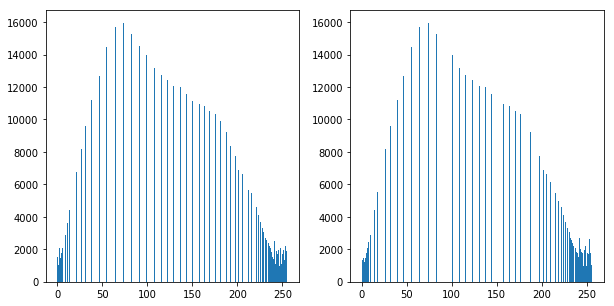

(None, None)

In [75]:
img = cv2.imread('pc5.jpg', 0)
img2 = img

hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

img = cdf[img]

img2 = cv2.equalizeHist(img2)

print(np.sum(img == img2))
print(np.sum(img != img2))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_hist(img)
plt.subplot(1, 2, 2)
plot_hist(img2), plt.show()

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

先ほど紹介したヒストグラム平坦化は画像全体に対して行っている。大半のケースではこのアイディアはあまり上手くいかない。

例えば以下に示す画像は入力画像とヒストグラム平坦化の結果画像である。


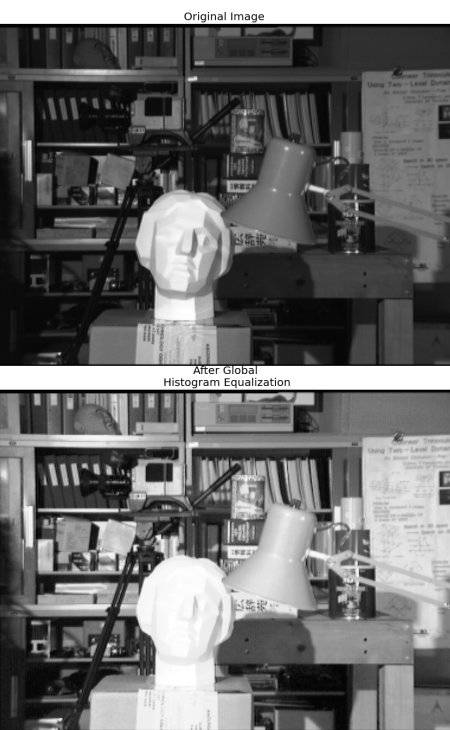

背景領域のコントラストは向上したが、胸像の顔を見ると過度に明るくなり詳細を失っている。これは、入力画像のヒストグラムが特定の範囲に偏っていないことが原因である(以下の入力画像のヒストグラムを参照)。

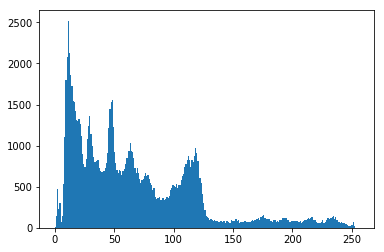

In [40]:
img = cv2.imread('tsukuba_l.png', 0)
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

この問題を解決するためには 適用的ヒストグラム平坦化 をしなければならない。これは、画像を “タイル(tiles)” (OpenCVのデフォルトでは8x8)と呼ばれる小領域に分割し、領域毎にヒストグラム平坦化を適用する。

(ノイズが無ければ)小領域中ではヒストグラムが小さい範囲に集中すると仮定している。ノイズがある場合，強調されてしまう。これを防ぐために コントラストの制限 を適用する。もしもビンの出現頻度が特定の上限値(OpenCVのデフォルトでは40)を超えた場合、上限値を超える画素はその他のビンに均等に分配され、その後にヒストグラム平坦化を適用する。

平坦化の適用後にタイルの境界に生じる疑似輪郭を消すためにbilinearの内挿をする。

以下のコードがOpenCVでCLAHEを適用するためのコードである:

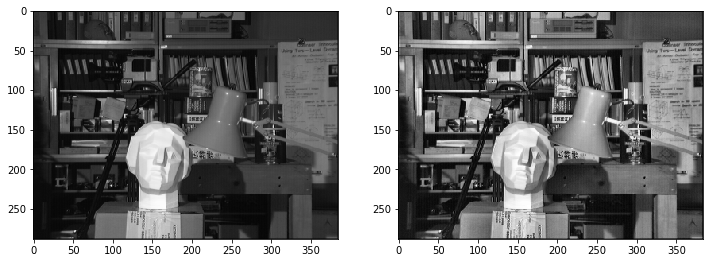

(<matplotlib.image.AxesImage at 0x281f8564ba8>, None)

In [43]:
img = cv2.imread('tsukuba_l.png', 0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cl1, cv2.COLOR_BGR2RGB)), plt.show()

# 補足資料

1. [Cambridge in Color website](http://www.cambridgeincolour.com/tutorials/histograms1.htm)
1. Wikipediaの [ヒストグラム平坦化(英語)](http://en.wikipedia.org/wiki/Histogram_equalization) の記事
1. [Numpyのマスクされた配列](http://docs.scipy.org/doc/numpy/reference/maskedarray.html)

コントラストの調節に関するStackOverflowのページも参照すること:
1. [どうすればOpenCV(C言語)を使ってコントラストを調節できますか?(英語)](http://stackoverflow.com/questions/10549245/how-can-i-adjust-contrast-in-opencv-in-c)
1. [OpenCVを使って画像の明るさやコントラストを均等化する方法を教えてください?(英語)](http://stackoverflow.com/questions/10561222/how-do-i-equalize-contrast-brightness-of-images-using-opencv)

# コードサンプル

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def plot_hist(img):
    """
    画像のヒストグラムを表示
    """

    if isGray(img):
        plt.hist(img.ravel(), 256, [0, 256])

        return  # モノクロ画像の場合

    color = ('blue', 'green', 'red')

    for i, col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col,  label=col)

    plt.xlim([0, 256])
    plt.xlabel('Pixel Value')
    plt.legend()
#     plt.show()


def img_equalize(img):
    """
    画像をヒストグラム平坦化する
    """
    if isGray(img):
        return cv2.equalizeHist(img)  # モノクロ画像の場合

    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)


def isGray(img):
    if img.ndim == 2:
        return True

## ヒストグラム平坦化（カラー）

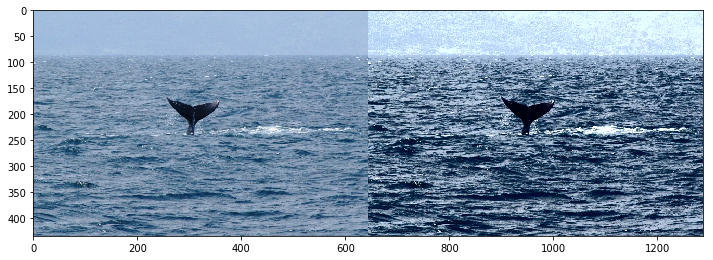

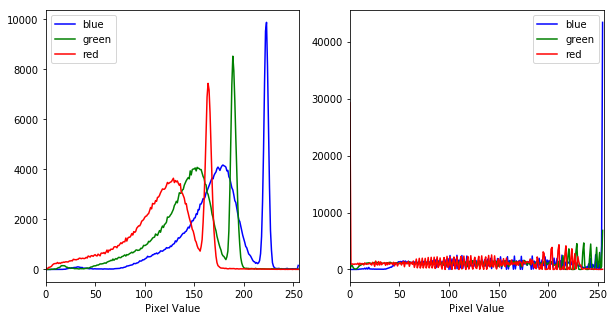

(None, None)

In [77]:
img = cv2.imread("IMGP4209.JPG", -1)
img2 = img_equalize(img)
res = np.hstack((img, img2))
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_hist(img)
plt.subplot(1, 2, 2)
plot_hist(img2), plt.show()

## ヒストグラム平坦化（モノクロ）

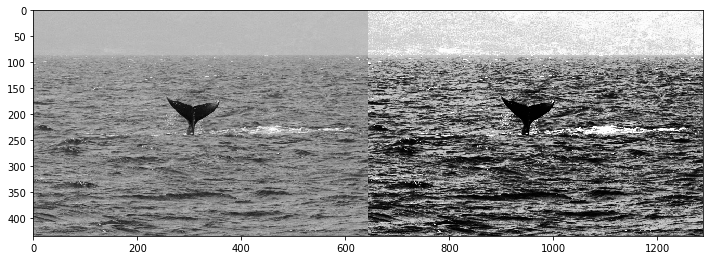

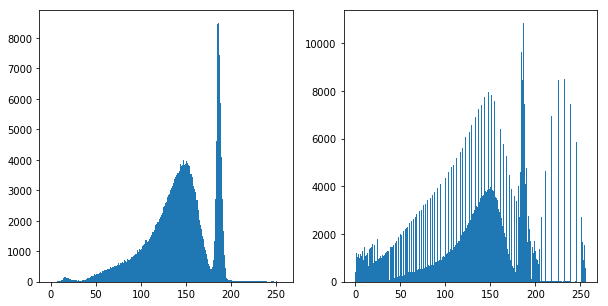

(None, None)

In [78]:
img = cv2.imread("IMGP4209.JPG",  0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))  # stacking images side-by-side
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_hist(img)
plt.subplot(1, 2, 2)
plot_hist(res), plt.show()

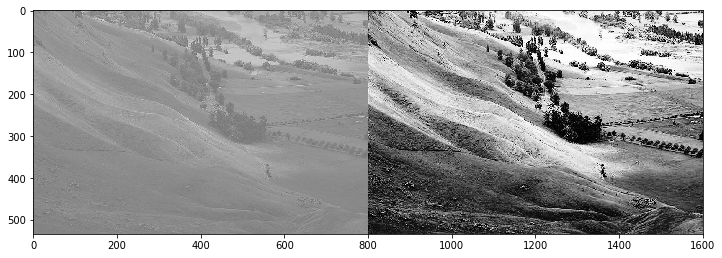

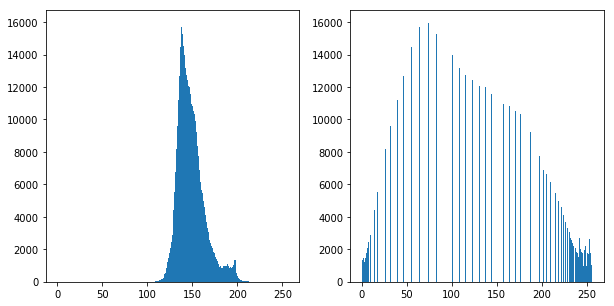

(None, None)

In [79]:
img = cv2.imread("pc5.jpg", -1)
img2 = img_equalize(img)
res = np.hstack((img, img2))

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_hist(img)
plt.subplot(1, 2, 2)
plot_hist(img2), plt.show()